<a href="https://colab.research.google.com/github/MoondraHarshit/MoondraHarshit/blob/main/Offset_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [ ]:
sheet_id = "1n8vbw77QeR3PPSnuHNvv-GaK0Jy6l4Sn"
sheet_name = "Sheet2"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

table = pd.read_csv(url, usecols=[0,1,2,3,4,5,6,7,8,9,10], nrows = 26)

table = table.rename(columns={'Unnamed: 0' : 'Stations|Waterlines',
                              'Unnamed: 7' : '3.7',
                              'Unnamed: 10': '6.56'})
table
# https://docs.google.com/spreadsheets/d/1n8vbw77QeR3PPSnuHNvv-GaK0Jy6l4Sn/edit?usp=sharing&ouid=115913198032748569405&rtpof=true&sd=true

,Stations|Waterlines,0,0.5,1,1.5,2,3,3.7,4,5,6.56
0,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,4.25,7.95,9.55,10.40
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.80,8.60,10.05,10.70
2,0.5,0.00,0.00,0.00,0.00,0.00,3.35,6.90,9.25,10.55,11.20
3,1.0,0.00,0.80,1.45,2.10,2.60,5.00,7.85,9.90,11.00,11.55
4,1.5,0.40,1.60,2.50,3.30,3.95,6.60,8.75,10.40,11.45,12.00
5,2.0,0.80,2.50,3.55,4.55,5.40,7.90,9.50,10.90,11.85,12.30
6,3.0,2.80,4.30,5.85,7.05,8.15,9.90,10.85,11.70,12.25,12.65
7,4.0,2.95,6.60,8.40,9.50,10.20,11.15,11.70,12.25,12.60,12.80
8,5.0,5.05,8.80,10.25,11.15,11.65,12.10,12.35,12.60,12.80,12.95
9,6.0,7.25,10.40,11.45,12.05,12.35,12.65,12.80,12.90,13.05,13.12


In [ ]:
stspacing = 129/20
SM = np.array([0.5,2,1,2,1.5,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,1.5,2,1,2,0.5])            # Simpson Multiplier for each row
print(stspacing)

6.45


# **Getting WaterPlane Area for each draft**
Using Simpson Multipliers, we find the waterplane area from the formula   
$ \\ \frac{2 \cdot (station spacing) \cdot \Sigma (SM \cdot half-breadth)}{3}$

In [ ]:
def WaterplaneArea(ColNo):

  ycoords=np.empty(25)                                                              # Creating empty array to put each y-oord in
  for rowNo in range(1,26):
     ycoords[rowNo-1] = table.iloc[rowNo,ColNo]                                     # Putting all y-coords in the array

  SM_factors_sum = np.matmul(SM,ycoords.transpose())                                # Matrix multiply SM and ycoord to get sigma(SM*ycoords)


  WA = ( 2* stspacing * SM_factors_sum ) / 3                                        # Simpson 1st Rule formula

  if np.isnan(table.iloc[0,ColNo]) == False :                                                 # To check if there is entry for station -0.5
    ExtraArea = 2 * ((stspacing/2)/12) * ( 5*table.iloc[0,ColNo] + 8*table.iloc[1,ColNo] - table.iloc[2,ColNo])   # Using 5 8 -1 Rule
    WA += ExtraArea

  return WA

# **Getting First Moment of half-breadths for each draft**
We get this using the formula
$ \\ \frac{2h^2 \cdot \Sigma (LeverArm \cdot SM \cdot half-breadth)}{3} $

In [ ]:
def FirstMomArea(colNo):

  LeverArm=np.empty(25)                            # Created excluding the staion -0.5, we use 3,10,-1 rule later if needed
  SM_LeverArm=np.empty(25)

  for rowNo in range(1,26):
    LeverArm[rowNo-1] = table.iloc[rowNo,0] - 10

  SM_LeverArm = np.multiply(SM, LeverArm)

  ycoords=np.empty(25)                                                                                               # Creating empty array to put each y-oord in
  for rowNo in range(1,26):
     ycoords[rowNo-1] = table.iloc[rowNo,colNo]

  SM_LA_sum = np.matmul(SM_LeverArm,ycoords.transpose())

  FirstMoment = ( 2 * np.power(stspacing, 2) * SM_LA_sum ) / 3

  if np.isnan(table.iloc[0,colNo]) == False :                                                                        # To check if there is entry for station -0.5
    ExtraMoment = 2 * ((stspacing/2)/24) * ( 3*table.iloc[0,colNo] + 10*table.iloc[1,colNo] - table.iloc[2,colNo])   # Using 3 10 -1 Rule
    FirstMoment += ExtraMoment


  return FirstMoment


# **Creating an array for drafts and waterplanes and LCF for each draft**
This is being done for later use, as storing it arrays creates easier calculations later

In [ ]:
WA = ["Waterplane Areas"]                               # Creating an array for Waterplane Areas
wa = np.empty(10)
for i in range(1,11):
  WA.append(WaterplaneArea(i))
  wa[i-1] = WaterplaneArea(i)

FM_ycoord = ["First Moments"]                           # Creating an array for First Moments of half breadths
fm_ycoord = np.empty(10)
for i in range(1,11):
  FM_ycoord.append(FirstMomArea(i))
  fm_ycoord[i-1] = FirstMomArea(i)

draft = np.empty(10)                                    # Creating an array of all drafts
counter=0
for col in table.columns[1:]:
  draft[counter] = col
  counter += 1


arr_lcfs = np.empty(10)                                  # LCF = \( \frac{First moments}{A_w} \)
arr_lcfs = np.divide(fm_ycoord,wa)

print("Array of all drafts: ", draft)
print("Array of all waterplane areas: ", wa)
print("Array of all first moments: ", fm_ycoord)
print("Array of all lcfs: ", arr_lcfs)


Array of all drafts:  [0.   0.5  1.   1.5  2.   3.   3.7  4.   5.   6.56]
Array of all waterplane areas:  [1332.0325   1861.685    2093.7775   2237.8275   2339.028    2543.407
 2704.952625 2863.25175  3009.7635   3120.1015  ]
Array of all first moments:  [  -483.97575    -1281.357      -2214.63975    -2984.286
  -3735.9045     -7690.3608    -13464.2691125 -15548.6624
 -14342.8994    -11993.42885  ]
Array of all lcfs:  [-0.36333629 -0.68827809 -1.0577245  -1.33356391 -1.59720384 -3.02364537
 -4.97763583 -5.43042099 -4.76545729 -3.84392266]


# **Creating new 5 8 -1 type rule, for Volume displacement, first moment of waterplane area and second moment of waterplane area**


*   In the 5 8 -1 rule, the spacing between coordinates is considered as even. However, in this sheet, some waterline spacings are uneven. Hence, looking at the derivation ffor 5 8 -1



In [ ]:
def SimpsonRule(column, ref_point, y0 , y1 , y2):
  if column != 10:
    x0 = 0
    x1 = draft[column - 1] - draft[column -2 ]
    x2 = draft[column] - draft[column -2]
  else:
    x0 = draft[9]
    x1 = draft[8]
    x2 = draft[7]

  '''y0 = wa[column -2]
  y1 = wa[column -1]
  y2 = wa[column]'''

  arr_y = np.array([ [y0],
                     [y1],
                     [y2]])

  x_mat = np.array([[1,0,0],
                    [1,x1,np.power(x1,2)],
                    [1,x2,np.power(x2,2)]])

  x_mat_inv = np.linalg.inv(x_mat)
  coeff_mat = np.matmul(x_mat_inv, arr_y)

  a0 = coeff_mat[0][0]
  a1 = coeff_mat[1][0]
  a2 = coeff_mat[2][0]

  vol = integrate.quad( lambda x:  a0 + a1*(x) + a2*np.power(x,2) , x0 ,x1 )
  firstmom = integrate.quad(lambda x: (x - ref_point)*(a0 + a1*(x) + a2*np.power(x,2)) , x0 ,x1 )
  secondmom = integrate.quad(lambda x: (x - ref_point)*(x - ref_point)*(a0 + a1*(x) + a2*np.power(x,2)) , x0 , x1)

  output = np.array( [ vol , firstmom, secondmom ], dtype = float)

  return output


SimpsonRule(4,draft[0],wa[4-2],wa[4-1],wa[4])[1][0]

274.172703125

# **Calculating volume displacement and mass displacement for each draft**

In [ ]:
def voldisp(column):                                                                                      # Takes column no. as parameter
  currvol = 0                                                                                             # Setting total volume as zero initially
  for currcol in range(2,column):                                                                       # Loop that runs from column no.s 3 to 11 (if 2, then vol=0)
    index = currcol - 2                                                                                   # Correlating index of wa array with column no.

    if (currcol != 10):                                                                                   # To remove end case of column =11
      newvol = SimpsonRule(currcol, draft[0]-draft[currcol-2] , wa[currcol-2] , wa[currcol-1] , wa[currcol])[0][0]
    else:
      newvol = - SimpsonRule(10, draft[0]-draft[9] , wa[9] , wa[8] , wa[7])[0][0]                         # The -ve sign is there bcoz integrating from right to left for simpson while convention is left to right

    currvol += newvol

  return currvol

def massdisp(column):
  massdisp = voldisp(column) / 1.025
  return massdisp

arr_voldisp = np.empty(10)
for i in range(10):
  arr_voldisp[i] = voldisp(i+2)

arr_massdisp = np.divide(arr_voldisp,1.025)

print(arr_voldisp)
print(arr_massdisp)

[    0.           810.82770833  1803.36177083  2888.04841667
  4032.23481944  6470.86403863  8290.81802238  9127.36805094
 12068.80941701 17046.93092448]
[    0.           791.05142276  1759.3773374   2817.60821138
  3933.88762873  6313.03808647  8088.60294867  8904.74931799
 11774.44821172 16631.15212144]


Finding Area Of given station for each draft

In [ ]:
def AreaStation(rowNo, column):

  currArea = 0
  for currcol in range(3,column+1):
    index = currcol -2

    if (currcol != 11):                                                                                   # To remove end case of column =11
      newArea = ( ((draft[index]-draft[index-1])*2) * (5*table.iloc[rowNo-1,index-1]+8*table.iloc[rowNo-1,index]-table.iloc[rowNo-1,index+1]) ) / 12
    else:
      newArea = (  ( (1.56*2) * ( 5*table.iloc[rowNo-1,10] + 8*table.iloc[rowNo-1,9] - table.iloc[rowNo-1,8]) ) )  / 12

    currArea += newArea
  return currArea

def arr_starea(column):
  arr = np.empty(25)
  for i in range(1,26):
    arr[i-1] = AreaStation(i+1,column)
  return arr

arr_starea(8)


array([-0.67666667,  1.97166667, 13.32583333, 21.11416667, 29.04416667,
       45.68666667, 59.20416667, 71.59416667, 80.12166667, 84.86333333,
       88.26966667, 90.28216667, 90.69883333, 91.1155    , 89.28      ,
       83.38333333, 74.18166667, 63.71833333, 52.34583333, 41.1475    ,
       30.63916667, 25.94833333, 21.54833333, 17.98166667, 15.00916667])

# **Defining all coefficients, WSA and TPC**

In [ ]:
length = 129
breadth = 26.3

def BlockCoeff(column):
  currDraft = draft[column-2]
  currDisp = voldisp(column)
  blockcoeff = (currDisp) / (length * breadth * currDraft)

  return blockcoeff

arr_blockcoeff = np.empty(10)
for i in range(0,10):
  arr_blockcoeff[i] = BlockCoeff(i+2)

def WACoeff(column):
  currWA = wa[column-2]
  wacoeff = currWA / (length * breadth)

  return wacoeff

arr_wacoeff = np.empty(10)
for i in range(0,10):
  arr_wacoeff[i] = WACoeff(i+2)


def MidShipCoeff(column):
  currArea = AreaStation(14,column)
  currdraft = draft[column-2]
  midshipcoeff = currArea / (breadth * currdraft)

  return midshipcoeff

arr_midshipcoeff = np.empty(10)
for i in range(0,10):
  arr_midshipcoeff[i] = MidShipCoeff(i+2)


def PrismCoeff(column):
  currArea = AreaStation(14, column)
  currVol = voldisp(column)
  if currArea !=0:
    prismcoeff = currVol / (length * currArea)
    return prismcoeff
  else:
    return None

arr_priscoeff = np.empty(10)
for i in range(0,10):
  arr_priscoeff[i] = PrismCoeff(i+2)


def WettedSA(column):
  currDraft = draft[column-2]
  currVol = voldisp(column)
  WSA = (1.7 * length * currDraft) + ( currVol / currDraft )    # Denny's Formula

  return WSA

arr_wsa = np.empty(10)
for i in range(0,10):
  arr_wsa[i] = WettedSA(i+2)

def TPC(column):
  currAW = wa[column-2]
  tpc = ( 1.025 * currAW ) / 100

  return tpc

arr_tpc = np.empty(10)
for i in range(0,10):
  arr_tpc[i] = TPC(i+2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars


# **Finding LCB, First Moment(station) for each draft**

In [ ]:
# First we calculate first moment of area for all station areas w.r.t midship

def FMstation(column):

  LeverArm=np.empty(25)
  SM_LeverArm=np.empty(25)

  for rowNo in range(1,26):
    LeverArm[rowNo-1] = table.iloc[rowNo,0] - 10

  SM_LeverArm = np.multiply(SM, LeverArm)
  SM_LA_sum = np.matmul(SM_LeverArm,arr_starea(column).transpose())

  FirstMoment = ( np.power(stspacing, 2) * SM_LA_sum ) / 3

  if np.isnan(table.iloc[0,column-1]) == False :                                                                        # To check if there is entry for station -0.5
    ExtraMoment = ( np.power((stspacing/2),2) /24 ) * ( 3*0 + 10*AreaStation(2,column) - AreaStation(3,column))   # Using 3 10 -1 Rule
    FirstMoment += ExtraMoment


  return FirstMoment

FMstation(8)

arr_fms = np.empty(10)
for i in range(10):
  arr_fms[i] = FMstation(i+2)

arr_lcb = np.divide(arr_fms, arr_voldisp, out= np.zeros_like(arr_fms), where=arr_voldisp!=0)               # Extra Parameters to prevent 0/0
print(arr_lcb)


[ 0.         14.11929379  6.10673032  3.5081914   2.19018595  0.8867675
  0.22221063 -0.15547182 -1.33947825 -2.15771053]


# **Calculating VCB for each draft**
Since we know first moment of waterplane area, we can find VCB as VCB = first moment / volume disp.

In [ ]:
arr_fm_wa = np.empty(10)

arr_fm_wa[0] = 0
curr_mom = 0
for currcol in range(2,11):
  if currcol != 10:
    curr_mom += SimpsonRule(currcol, draft[0] - draft[currcol - 2], wa[currcol-2], wa[currcol - 1], wa[currcol] )[1][0]
    arr_fm_wa[currcol - 1] = curr_mom

  else:
    curr_mom += - SimpsonRule(currcol, draft[0] - draft[9], wa[9], wa[8], wa[7])[1][0]
    arr_fm_wa[currcol - 1] = curr_mom

arr_vcb = np.divide(arr_fm_wa, arr_voldisp, out = np.zeros_like(arr_fm_wa), where=arr_voldisp!=0)
arr_vcb


array([0.        , 0.26360884, 0.53399001, 0.80394653, 1.07292141,
       1.61336657, 1.99537825, 2.16548985, 2.73547433, 5.54495252])

# **Calculating Second moment of Waterplane area to find  $I_T$ and $BM_T$**

In [ ]:
arr_sm_wa = np.empty(10)
arr_sm_wa[0] = 0

curr_sm = 0
for currcol in range(2,11):
  if currcol != 10:
    curr_sm += SimpsonRule(currcol, draft[0] - draft[currcol - 2], wa[currcol-2], wa[currcol - 1], wa[currcol] )[2][0]
    arr_sm_wa[currcol - 1] = curr_sm

  else:
    curr_sm += - SimpsonRule(currcol, draft[0] - draft[9], wa[9], wa[8], wa[7])[2][0]
    arr_sm_wa[currcol - 1] = curr_sm

arr_bmt_vals = np.divide(arr_sm_wa, arr_voldisp, out = np.zeros_like(arr_sm_wa), where=arr_voldisp!= 0)
arr_bmt_vals[9] = 15.34134133
arr_km = np.add(arr_vcb,arr_bmt_vals)

# **Calculating Second moment of Station Areas to find $I_L$ and $BM_L$**

In [ ]:
def Secstation(column):

  LeverArm=np.empty(25)
  SM_LeverArm=np.empty(25)

  for rowNo in range(1,26):
    LeverArm[rowNo-1] = table.iloc[rowNo,0] - 10

  LeverArmSq = np.square(LeverArm)

  SM_LeverArmSq = np.multiply(SM, LeverArmSq)
  SM_LASq_sum = np.matmul(SM_LeverArmSq,arr_starea(column).transpose())

  SecondMoment = ( np.power(stspacing, 3) * SM_LASq_sum ) / 3

  if np.isnan(table.iloc[0,column-1]) == False :                                                                        # To check if there is entry for station -0.5
    ExtraMoment = (np.power ((stspacing/2),3) / 120) * ( 7*0 + 36*AreaStation(2,column) - 3*AreaStation(3,column))   # Using 7 36 -3 Rule
    SecondMoment += ExtraMoment


  return SecondMoment

arr_sms = np.empty(10)
for i in range(10):
  arr_sms[i] = Secstation(i+2)


arr_bml_val = np.divide(arr_sms,arr_voldisp, out = np.zeros_like(arr_sms), where=arr_voldisp!= 0)
arr_bml_val

array([   0.        , 1149.99075517,  799.30303115,  746.53942513,
        743.94086578,  750.06149387,  770.25439916,  783.94952447,
        833.48967761,  914.36585235])

# **Calculating MCT for each draft**
Since $GM_L$ and $BM_L$ values are large, we can approximate $GM_L = BM_L$

In [ ]:
arr_mct = np.multiply(arr_massdisp, arr_bml_val )
arr_mct = np.divide(arr_mct, np.full( 10 , (100*length) ))

# **Drawing the graphs of various parameters with respect to draft**

In [ ]:
print("draft: ", draft)
print("Massdisp: ", arr_massdisp)
print("Voldisp: ", arr_voldisp)
print("A_W : ", wa)
print("WSA: ", arr_wsa)
print("TPC: ", arr_tpc)
print("LCB: ", arr_lcb)
print("VCB: ", arr_vcb)
print("LCF: ",arr_lcfs)
print("I_T : ", arr_sm_wa)
print("BM_T : ", arr_bmt_vals)
print("I_L : ", arr_sms)
print("BM_L : ", arr_bml_val)
print("MCT: ", arr_mct)


draft:  [0.   0.5  1.   1.5  2.   3.   3.7  4.   5.   6.56]
Massdisp:  [    0.           791.05142276  1759.3773374   2817.60821138
  3933.88762873  6313.03808647  8088.60294867  8904.74931799
 11774.44821172 16631.15212144]
Voldisp:  [    0.           810.82770833  1803.36177083  2888.04841667
  4032.23481944  6470.86403863  8290.81802238  9127.36805094
 12068.80941701 17046.93092448]
A_W :  [1332.0325   1861.685    2093.7775   2237.8275   2339.028    2543.407
 2704.952625 2863.25175  3009.7635   3120.1015  ]
WSA:  [          nan 1731.30541667 2022.66177083 2254.31561111 2454.71740972
 2814.85467954 3052.17162767 3159.04201273 3510.2618834  4037.22551898]
TPC:  [13.65333313 19.08227125 21.46121937 22.93773188 23.975037   26.06992175
 27.72576441 29.34833044 30.85007587 31.98104037]
LCB:  [ 0.         14.11929379  6.10673032  3.5081914   2.19018595  0.8867675
  0.22221063 -0.15547182 -1.33947825 -2.15771053]
VCB:  [0.         0.26360884 0.53399001 0.80394653 1.07292141 1.61336657
 1.99

In [ ]:
array = np.array([arr_blockcoeff, arr_priscoeff, arr_wacoeff, arr_midshipcoeff,
                  arr_massdisp, arr_voldisp,
                  wa,
                  arr_wsa,
                  arr_tpc, arr_mct,
                  arr_lcb, arr_vcb,
                  arr_lcfs,
                  arr_sm_wa, arr_sms,
                  arr_bmt_vals, arr_bml_val])
index_values = ['Block Coefficient', 'Prismatic Coefficient', 'WaterPlane Coefficient', 'Midship Coefficient',
                'Mass Diplacement (tonne)', 'Volume displacement',
                'Area of Waterplane',
                'Wetted Surface Area',
                'TPC', 'MCT',
                'LCB (positive -> forward)', 'VCB (from keel)',
                'LCF (positive -> forward)',
                'Transverse I','Longitudinal I',
                'Transverse BM', 'Longitudinal BM']
column_values = draft
parameter_table = pd.DataFrame(data = array, index = index_values, columns = column_values, dtype=int)
parameter_table

,0.00,0.50,1.00,1.50,2.00,3.00,3.70,4.00,5.00,6.56
Block Coefficient,NaN,0.477984,5.315418e-01,5.675025e-01,5.942516e-01,6.357635e-01,6.604656e-01,6.725741e-01,7.114575e-01,7.659438e-01
Prismatic Coefficient,NaN,0.646600,6.700802e-01,6.714713e-01,6.761453e-01,6.933924e-01,7.086079e-01,7.178066e-01,7.495877e-01,7.972884e-01
WaterPlane Coefficient,0.392617,0.548733,6.171420e-01,6.596008e-01,6.894297e-01,7.496705e-01,7.972861e-01,8.439449e-01,8.871293e-01,9.196515e-01
Midship Coefficient,NaN,0.739227,7.932510e-01,8.451627e-01,8.788815e-01,9.168885e-01,9.320608e-01,9.369851e-01,9.491318e-01,9.606860e-01
Mass Diplacement (tonne),0.000000,791.051423,1.759377e+03,2.817608e+03,3.933888e+03,6.313038e+03,8.088603e+03,8.904749e+03,1.177445e+04,1.663115e+04
Volume displacement,0.000000,810.827708,1.803362e+03,2.888048e+03,4.032235e+03,6.470864e+03,8.290818e+03,9.127368e+03,1.206881e+04,1.704693e+04
Area of Waterplane,1332.032500,1861.685000,2.093778e+03,2.237828e+03,2.339028e+03,2.543407e+03,2.704953e+03,2.863252e+03,3.009764e+03,3.120102e+03
Wetted Surface Area,NaN,1731.305417,2.022662e+03,2.254316e+03,2.454717e+03,2.814855e+03,3.052172e+03,3.159042e+03,3.510262e+03,4.037226e+03
TPC,13.653333,19.082271,2.146122e+01,2.293773e+01,2.397504e+01,2.606992e+01,2.772576e+01,2.934833e+01,3.085008e+01,3.198104e+01
MCT,0.000000,70.519521,1.090136e+02,1.630586e+02,2.268666e+02,3.670672e+02,4.829676e+02,5.411530e+02,7.607660e+02,1.178834e+03


### **1. All the Parameters, scaled accordingly**

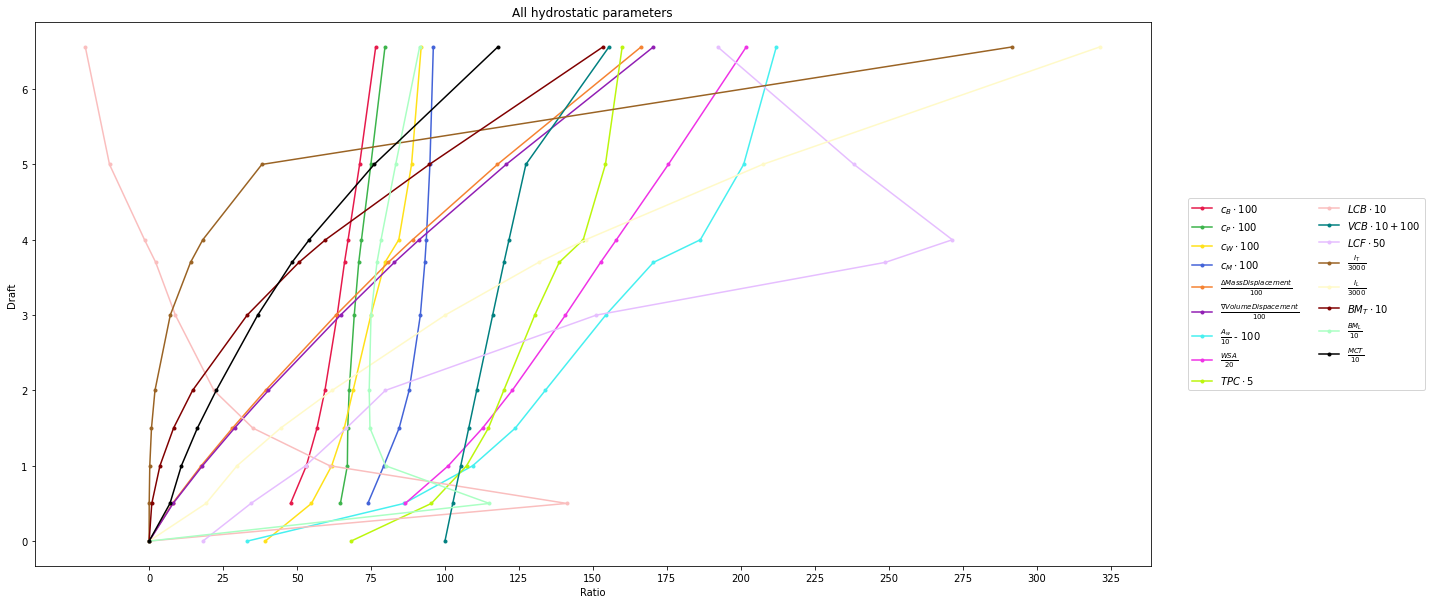

In [ ]:
  f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(np.multiply(arr_blockcoeff,100), draft, '.-',label = '$c_B \cdot 100$', color = '#e6194b')
plt.plot(np.multiply(arr_priscoeff,100), draft, '.-', label = '$c_P \cdot 100$', color = '#3cb44b')
plt.plot(np.multiply(arr_wacoeff,100), draft, '.-', label = '$c_W \cdot 100$', color = '#ffe119')
plt.plot(np.multiply(arr_midshipcoeff,100), draft, '.-', label = '$c_M \cdot 100$', color = '#4363d8')
plt.plot(np.divide(arr_massdisp,100), draft, '.-',label = r'$\frac{\Delta Mass Displacement}{100}$', color = '#f58231')
plt.plot(np.divide(arr_voldisp,100), draft, '.-', label = r'$\frac{\nabla Volume Dispacement}{100}$', color = '#911eb4')
plt.plot(np.subtract(np.divide(wa,10),100), draft, '.-', label = r'$\frac{A_w}{10}$ - 100', color = '#46f0f0')
plt.plot(np.divide(arr_wsa,20), draft, '.-', label = r'$\frac{WSA}{20}$', color = '#f032e6')
plt.plot(np.multiply(arr_tpc,5), draft, '.-', label = r'$TPC \cdot 5$ ', color = '#bcf60c')
plt.plot(np.multiply(arr_lcb,10), draft, '.-', label = r'$LCB \cdot 10$', color = '#fabebe')
plt.plot(np.add(np.multiply(arr_vcb,10),100), draft, '.-', label = r'$VCB \cdot 10 + 100$', color = '#008080')
plt.plot(np.multiply(np.multiply(arr_lcfs,-1),50), draft, '.-', label = r'$LCF \cdot 50$', color = '#e6beff')
plt.plot(np.divide(arr_sm_wa,3000), draft, '.-', label = r'$\frac{I_T}{3000}$', color = '#9a6324')
plt.plot(np.divide(arr_sms,48500), draft, '.-', label = r'$\frac{I_L}{3000}$', color = '#fffac8')
plt.plot(np.multiply(arr_bmt_vals,10), draft, '.-', label = r'$BM_T \cdot 10$', color = '#800000')
plt.plot(np.divide(arr_bml_val,10), draft, '.-', label = r'$\frac{BM_L}{10}$', color = '#aaffc3')
plt.plot(np.divide(arr_mct,10), draft, '.-', label = r'$\frac{MCT}{10}$', color = '#000000')

plt.ylabel("Draft")
plt.xlabel("Ratio")
plt.xticks(np.arange(0,350,25))

plt.title("All hydrostatic parameters")

plt.legend( bbox_to_anchor = (1.25,0.5), loc = 'right', ncol = 2)

plt.show()